In this notebook I summarize the results of the cognitive tomography toy model with
1. Analytical solution
2. ABC solution and its limits

Plus some illustration of the ABC's limitations when doing inference on variance

In [7]:
print(watermark())
print(watermark(packages="aesara,nutpie,pymc,arviz"))


Last updated: 2023-06-02T21:08:25.624192+02:00

Python implementation: CPython
Python version       : 3.10.8
IPython version      : 8.7.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
CPU cores   : 8
Architecture: 64bit

aesara: 2.8.7
nutpie: 0.3.0
pymc  : 4.4.0
arviz : 0.14.0



In [4]:
# import functions for ABC inference
%run ABC_utils.ipynb


In [2]:
# avoid too verbose logging (there are still some parts that I couldn't omit)
import logging
logger = logging.getLogger('pymc')
logger.setLevel(logging.ERROR)

### Setting up the problem

We define the following model with $x$ and $z$ being observed, $y$ and $\sigma^2$ target of inference. In the nice case when everything is normally distributed, $z$ is tractable and follows a normal distribution. 

However, in a more complicated case we won't have a closed-form solution for $z$ and we want to make inference about $P(x|y, \sigma^2)$ and feed that into the likelihood of $z$. 

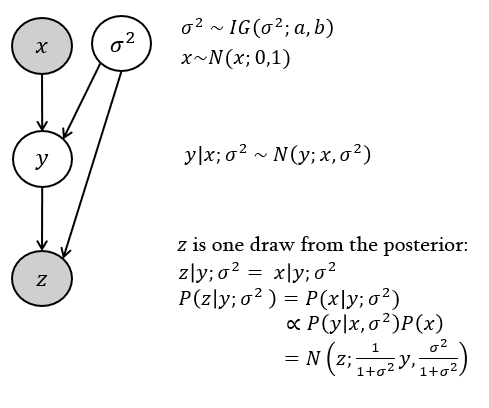


### The analytical solution

Check some cases where $\sigma^2$ is not in line with the prior, N is moderate.

The sampler of the analytic solution: it finds the posterior for small $\sigma^2$.

Here $\sigma^2 = 0.1, 0.2$

c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\arviz\data\base.py:221: UserWarning: More chains (5000) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


CPU times: total: 18.5 s
Wall time: 40.1 s


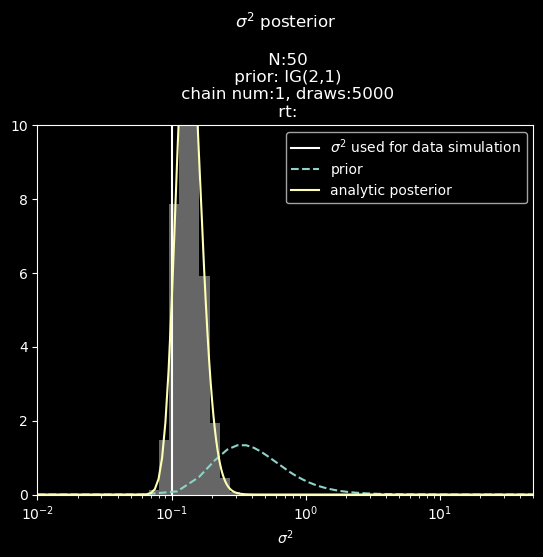

In [3]:
N = 50
sigma2_true = 0.1
ig_1 = 2
ig_2 = 1

x_sim, y_sim, z_sim, model = genDatawModel_analytic(N = N, sigma2_true = sigma2_true, ig_1 = ig_1, ig_2 = ig_2)
%time trace_analytic = pm.sample(5000, model = model, chains=1)

plot_posterior_hist_fromstore(trace_analytic, x_sim,  sigma2_true, ig_1, ig_2, N, 1, 5000, "")


c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\arviz\data\base.py:221: UserWarning: More chains (5000) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


CPU times: total: 44.9 s
Wall time: 45.5 s


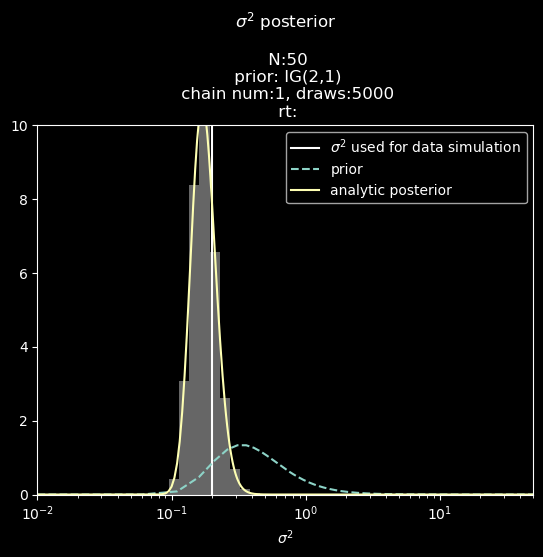

In [58]:
N = 50
sigma2_true = 0.2
ig_1 = 2
ig_2 = 1

x_sim, y_sim, z_sim, model = genDatawModel_analytic(N = N, sigma2_true = sigma2_true, ig_1 = ig_1, ig_2 = ig_2)
%time trace_analytic = pm.sample(5000, model = model, chains=1)

plot_posterior_hist_fromstore(trace_analytic, x_sim,  sigma2_true, ig_1, ig_2, N, 1, 5000, "")


For higher $\sigma^2$ values the posterior matches the analytic solution (N=50)

$\sigma^2 = 2$

c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\arviz\data\base.py:221: UserWarning: More chains (5000) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


CPU times: total: 37.6 s
Wall time: 37.6 s


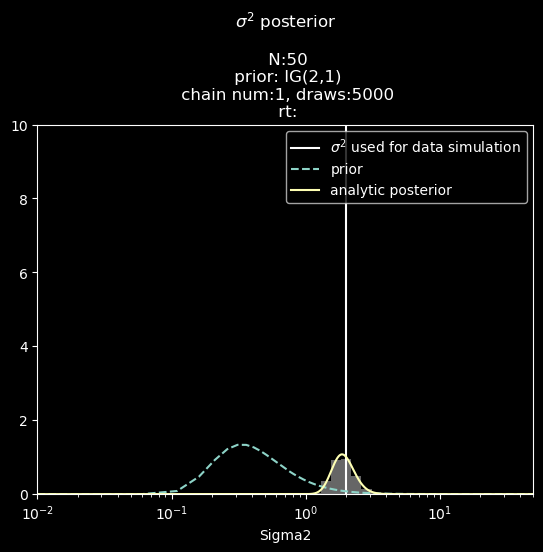

In [56]:
N = 50
sigma2_true = 2
ig_1 = 2
ig_2 = 1

x_sim, y_sim, z_sim, model = genDatawModel_analytic(N = N, sigma2_true = sigma2_true, ig_1 = ig_1, ig_2 = ig_2)
%time trace_analytic = pm.sample(5000, model = model, chains=1)

plot_posterior_hist_fromstore(trace_analytic, x_sim,  sigma2_true, ig_1, ig_2, N, 1, 5000, "")


Flatter $\sigma^2$ prior doesn't hurt the sampler

$\sigma^2 = 0.2, 2$

c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\arviz\data\base.py:221: UserWarning: More chains (5000) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


CPU times: total: 35.8 s
Wall time: 41.1 s


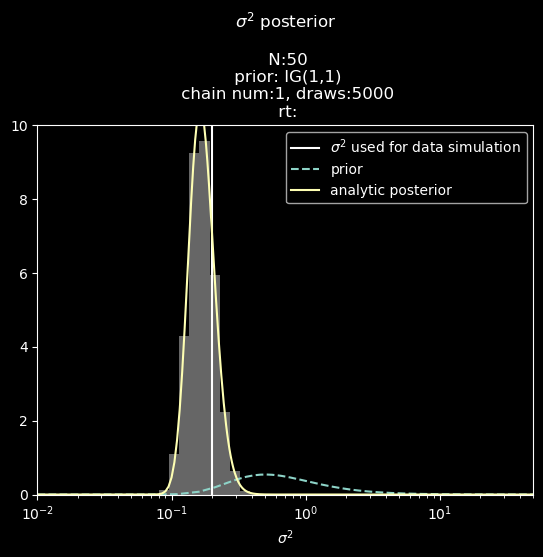

In [59]:
N = 50
sigma2_true = 0.2
ig_1 = 1
ig_2 = 1

x_sim, y_sim, z_sim, model = genDatawModel_analytic(N = N, sigma2_true = sigma2_true, ig_1 = ig_1, ig_2 = ig_2)
%time trace_analytic = pm.sample(5000, model = model, chains=1)

plot_posterior_hist_fromstore(trace_analytic, x_sim,  sigma2_true, ig_1, ig_2, N, 1, 5000, "")


c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\arviz\data\base.py:221: UserWarning: More chains (5000) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


CPU times: total: 36.7 s
Wall time: 37.6 s


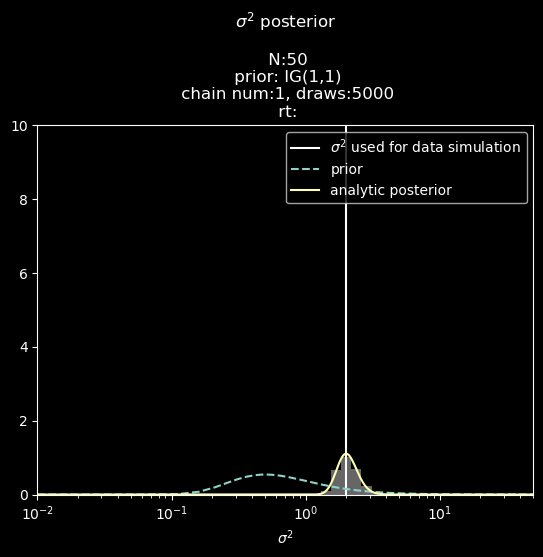

In [60]:
N = 50
sigma2_true = 2
ig_1 = 1
ig_2 = 1

x_sim, y_sim, z_sim, model = genDatawModel_analytic(N = N, sigma2_true = sigma2_true, ig_1 = ig_1, ig_2 = ig_2)
%time trace_analytic = pm.sample(5000, model = model, chains=1)

plot_posterior_hist_fromstore(trace_analytic, x_sim,  sigma2_true, ig_1, ig_2, N, 1, 5000, "")


### No analytical solution

When there is no analytical solution, we need to do an extra sampling step to have acces to $P(x|y, \sigma^2)$.

First, we try ABC, with the same setup we used above, $\sigma^2 = 0.2, 0.1$

In [8]:
result = runModel_ABC(sigma2_true = 0.2, N=50, eps=1, ig_1=2, ig_2=1, ndraws=5000, nchains=1, ncores=1)

c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\pymc\util.py:501: FutureWarning: The tag attribute observations is deprecated. Use model.rvs_to_values[rv] instead
  warnings.warn(
c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\pymc\model.py:973: FutureWarning: Model.RV_dims is deprecated. User Model.named_vars_to_dims instead.
  warnings.warn(


 <function gaussian at 0x000001A39295BBE0>
<function gaussian at 0x000001A39295BBE0>


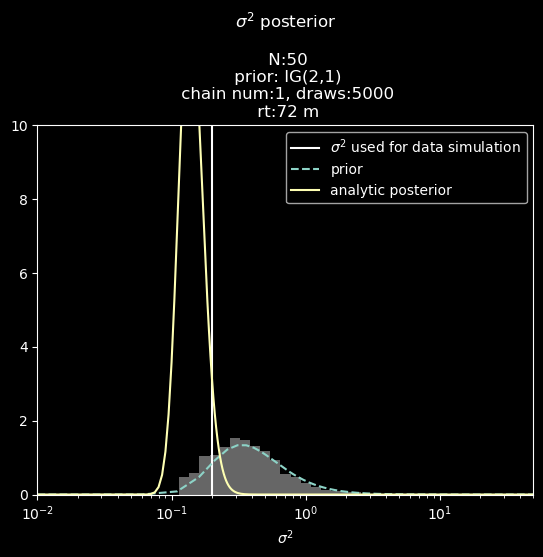

In [90]:
plot_posterior_hist_fromstore(trace=result["trace"], stimulus_simulation=result["x_sim"], sigma2=0.2, inv_1=2, inv_2=1, N=50, chain_num=1, draw=5000, rt="72 m")

In [12]:
result2 = runModel_ABC(sigma2_true = 0.1, N=50, eps=1, ig_1=2, ig_2=1, ndraws=5000, nchains=1, ncores=1)

c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\pymc\util.py:501: FutureWarning: The tag attribute observations is deprecated. Use model.rvs_to_values[rv] instead
  warnings.warn(


 <function gaussian at 0x000001A39295BBE0>
<function gaussian at 0x000001A39295BBE0>


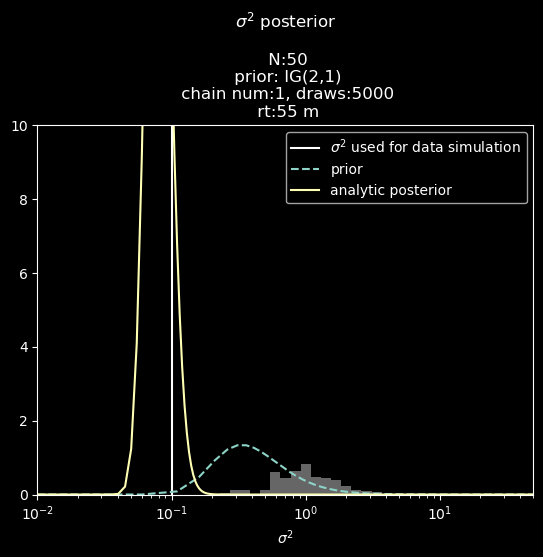

In [35]:
plot_posterior_hist_fromstore(trace=result2["trace"], stimulus_simulation=result2["x_sim"], sigma2=0.1, inv_1=2, inv_2=1, N=50, chain_num=1, draw=5000, rt="55 m")

Flatter $\sigma^2$ prior is even worse: $\sigma^2=0.1$, prior: IG(1,1)

In [34]:
result3 = runModel_ABC(sigma2_true = 0.1, N=50, eps=1, ig_1=1, ig_2=1, ndraws=5000, nchains=1, ncores=1)

c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\pymc\util.py:501: FutureWarning: The tag attribute observations is deprecated. Use model.rvs_to_values[rv] instead
  warnings.warn(


 <function gaussian at 0x000001A39295BBE0>
<function gaussian at 0x000001A39295BBE0>


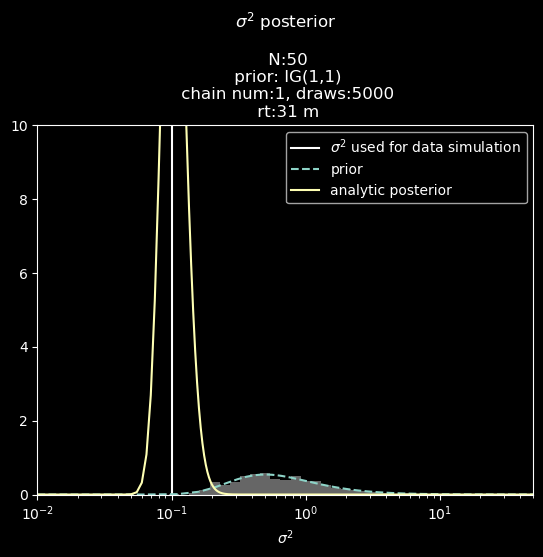

In [36]:
plot_posterior_hist_fromstore(trace=result3["trace"], stimulus_simulation=result3["x_sim"], sigma2=0.1, inv_1=1, inv_2=1, N=50, chain_num=1, draw=5000, rt="31 m")

Based on basic ABC tests (see ABC_Gauss) the inference if $\sigma^2$ is not easy, even in the case where the nested setup is omitted and we just want to infer the variance of a gaussian. 
However, in those cases there are $\sigma^2$ values that are fairly well inferred with ABC. We will look into that in this nested setup now.

In [37]:
# to result 0.2 sigma2 in the z posterior distribution
result4 = runModel_ABC(sigma2_true = 0.25, N=50, eps=1, ig_1=2, ig_2=1, ndraws=5000, nchains=1, ncores=1)

c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\pymc\util.py:501: FutureWarning: The tag attribute observations is deprecated. Use model.rvs_to_values[rv] instead
  warnings.warn(


 <function gaussian at 0x000001A39295BBE0>
<function gaussian at 0x000001A39295BBE0>


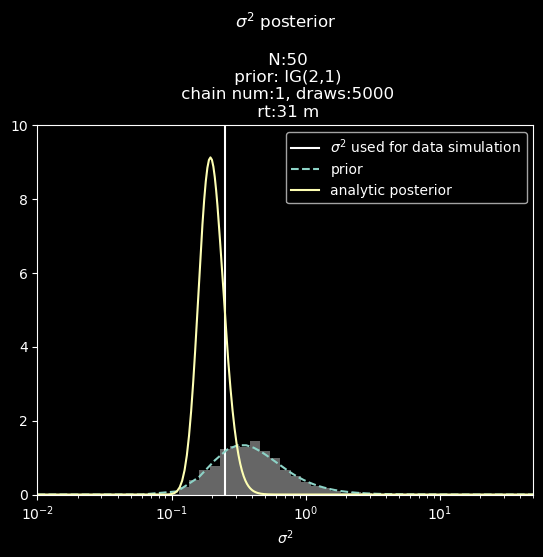

In [38]:
plot_posterior_hist_fromstore(trace=result4["trace"], 
                              stimulus_simulation=result4["x_sim"], 
                              sigma2=0.25, 
                              inv_1=2, inv_2=1, 
                              N=50, 
                              chain_num=1, draw=5000, rt="31 m")

Well, that doesn't look good.
Let's check the ABC with the analytical posterior in the simulator: here we check if the simulator part is the bottleneck.

From this point things are even less user-friendly (hope to change it in the next souple of days - 2023 06 02)

In [42]:
result4_an = runModel_ABC_analyticPost(sigma2_true = 0.25, N=50, eps=1, ig_1=2, ig_2=1, ndraws=5000, nchains=1, ncores=1)

 <function gaussian at 0x000001A39295BBE0>
<function gaussian at 0x000001A39295BBE0>


ABC with analytical posterior


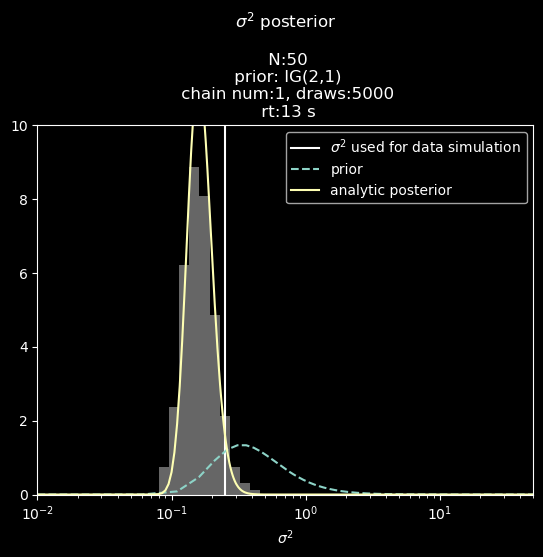

In [44]:
print("ABC with analytical posterior")
plot_posterior_hist_fromstore(trace=result4_an["trace"], 
                              stimulus_simulation=result4_an["x_sim"], 
                              sigma2=0.25, 
                              inv_1=2, inv_2=1, 
                              N=50, 
                              chain_num=1, draw=5000, rt="13 s")

Checking with different setups the ABC with analytical simulation

In [145]:
result8_an = runModel_ABC_analyticPost(sigma2_true = 0.15, N=50, eps=1, ig_1=2, ig_2=1, ndraws=5000, nchains=1, ncores=1)

 <function gaussian at 0x000001A39295BBE0>
<function gaussian at 0x000001A39295BBE0>


ABC with analytical posterior


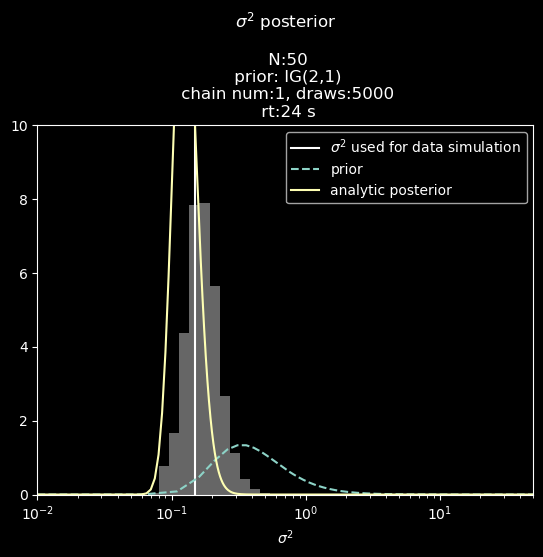

In [147]:
print("ABC with analytical posterior")
plot_posterior_hist_fromstore(trace = result8_an["trace"], 
                              stimulus_simulation = result8_an["x_sim"], 
                              sigma2 = 0.15, 
                              inv_1 = 2, inv_2 = 1, 
                              N = 50, 
                              chain_num = 1, draw = 5000, rt="24 s")

In [148]:
result9_an = runModel_ABC_analyticPost(sigma2_true = 0.25, 
                                       N = 50, 
                                       eps = 1, 
                                       ig_1 = 1, ig_2 = 1, 
                                       ndraws = 5000, nchains = 1, ncores = 1)

 <function gaussian at 0x000001A39295BBE0>
<function gaussian at 0x000001A39295BBE0>


ABC with analytical posterior


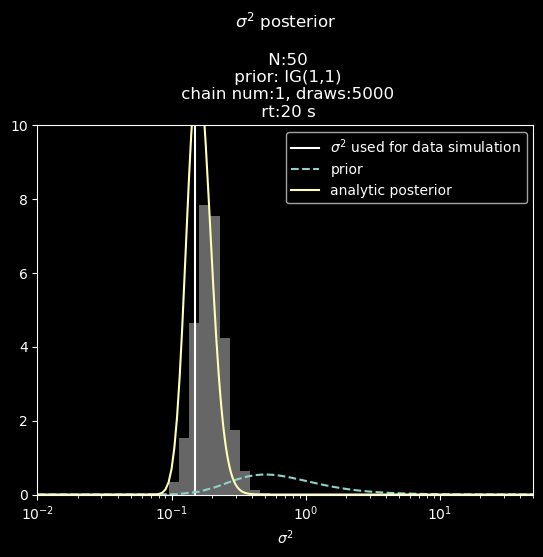

In [151]:
print("ABC with analytical posterior")
plot_posterior_hist_fromstore(trace = result9_an["trace"], 
                              stimulus_simulation = result9_an["x_sim"], 
                              sigma2 = 0.15, 
                              inv_1 = 1, inv_2 = 1, 
                              N = 50, 
                              chain_num = 1, draw = 5000, rt="20 s")

In [152]:
result10_an = runModel_ABC_analyticPost(sigma2_true = 0.05, N=50, eps=1, ig_1=2, ig_2=1, ndraws=5000, nchains=1, ncores=1)

 <function gaussian at 0x000001A39295BBE0>
<function gaussian at 0x000001A39295BBE0>


ABC with analytical posterior


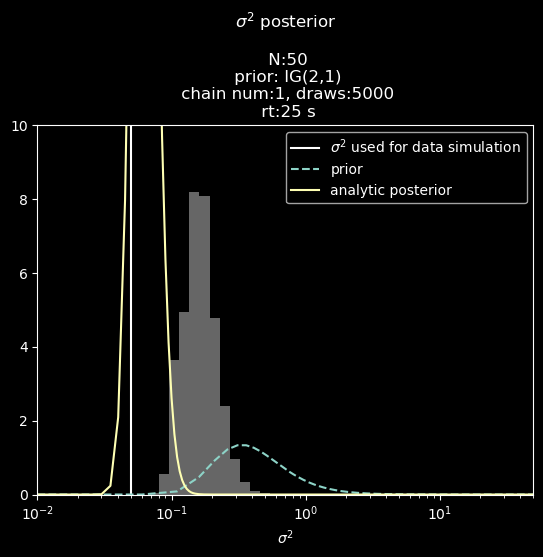

In [153]:
print("ABC with analytical posterior")
plot_posterior_hist_fromstore(trace = result10_an["trace"], 
                              stimulus_simulation = result10_an["x_sim"], 
                              sigma2 = 0.05, 
                              inv_1 = 2, inv_2 = 1, 
                              N = 50, 
                              chain_num = 1, draw = 5000, rt="25 s")

So it looks like that (for small $\sigma^2$ the ABC works in the scaled version).

Let's check it with the non-analytical posterior in the simulator, same parameters:

In [58]:
global Xpost_sim
global sigma2_sim
global y_sim

Xpost_sim=np.array([])
sigma2_sim=np.array([])
y_sim=np.array([])

res_checkPost=runModel_ABC(sigma2_true = 0.25, N=50, eps=1, ig_1=2, ig_2=1, ndraws=5000, nchains=1, ncores=1)

c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\pymc\util.py:501: FutureWarning: The tag attribute observations is deprecated. Use model.rvs_to_values[rv] instead
  warnings.warn(


 <function gaussian at 0x000001A39295BBE0>
<function gaussian at 0x000001A39295BBE0>


It doesn't look very good.

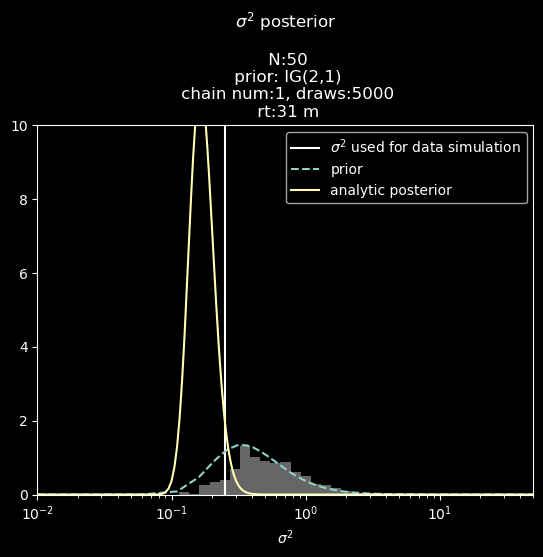

In [59]:
println("running ABC on the CT model, same parameters that made the ")
plot_posterior_hist_fromstore(trace=res_checkPost["trace"], 
                              stimulus_simulation=res_checkPost["x_sim"], 
                              sigma2=0.25, 
                              inv_1=2, inv_2=1, 
                              N=50, 
                              chain_num=1, draw=5000, rt="31 m")

Let's check the posteriors from the simulator, to see if it returns with the proper posterior.

In [62]:
%store Xpost_sim
%store sigma2_sim
%store y_sim

Stored 'Xpost_sim' (ndarray)
Stored 'sigma2_sim' (ndarray)
Stored 'y_sim' (ndarray)


In [60]:
N=50
ndraws=5000

nit_beta=int(len(sigma2_sim)/ndraws)

yS=y_sim
yS=np.reshape(yS, (nit_beta,ndraws,N))

XpostS=Xpost_sim
XpostS=np.reshape(XpostS, (nit_beta,ndraws,N))

sigma2S=sigma2_sim
sigma2S=np.reshape(sigma2S, (nit_beta,ndraws))
sigma2S_reshaped=np.reshape(np.repeat(sigma2S,N), (nit_beta,ndraws,N))

normalized_posterior = (XpostS - 1/(1+sigma2S_reshaped)*yS) / np.sqrt((sigma2S_reshaped/(1+sigma2S_reshaped)))

### Check if the posterior passed to ABC is correct

It looks like the problem is not with the samples from the simulator, they follow the analytical posterior:

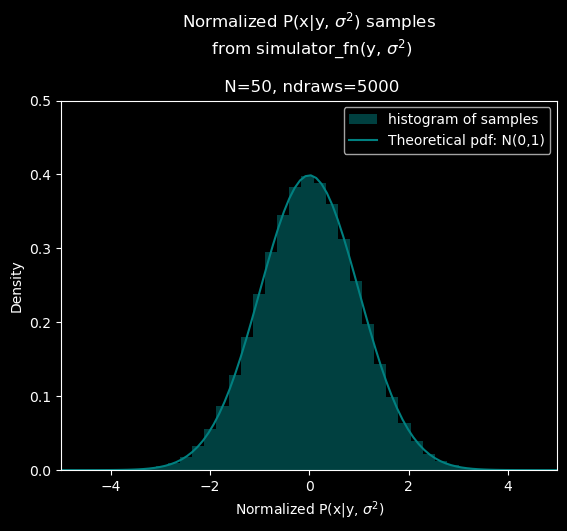

In [66]:
plt.hist(normalized_posterior.reshape(N*ndraws*nit_beta), density=True, bins=40, color='teal', alpha=0.5, label='histogram of samples')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, st.norm.pdf(x, 0, 1), alpha=1, color='teal', label='Theoretical pdf: N(0,1)')
plt.title('Normalized P(x|y, $\sigma^2$) samples \n from simulator_fn(y, $\sigma^2$) \n\n N=50, ndraws=5000')
plt.xlabel('Normalized P(x|y, $\sigma^2$)')
plt.ylabel('Density')
axes=plt.gca()
axes.set_xlim([-5,5])
axes.set_ylim([0,0.5])

plt.legend(loc="upper right")


In [128]:
global Xpost_sim_4
global sigma2_sim_4
global y_sim_4

Xpost_sim_4=np.array([])
sigma2_sim_4=np.array([])
y_sim_4=np.array([])

res_checkPost4 = runModel_ABC(sigma2_true = 0.25, N=10, eps=1, ig_1=2, ig_2=1, ndraws=3, nchains=1, ncores=1, threshold = 0.1, corr_threshold=0.005)

c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\pymc\util.py:501: FutureWarning: The tag attribute observations is deprecated. Use model.rvs_to_values[rv] instead
  warnings.warn(


 <function gaussian at 0x000001A39295BBE0>
<function gaussian at 0x000001A39295BBE0>
0.7673750492611473
0.9959039925719649
0.6341331304258448
0.6268904101521418
0.7905444658273553
1.0007374808326939


c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\pymc\smc\sampling.py:239: UserWarning: The number of samples is too small to check convergence reliably.
  _compute_convergence_checks(idata, draws, model, trace)


In [130]:
res_checkPost4["trace"]

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

 Trying with different smc threshold, to increase the number of steps (reflected in the beta dimensionality). This is because the only difference between the analytical and sampled simulator is the number of steps the smc takes.

threshold = 0.5 --> 0.75

In [133]:
""" global Xpost_sim
global sigma2_sim
global y_sim

Xpost_sim=np.array([])
sigma2_sim=np.array([])
y_sim=np.array([]) """

res_checkPost_th09 = runModel_ABC(sigma2_true = 0.25, 
                                N=50, 
                                eps=1, 
                                ig_1=2, ig_2=1, 
                                ndraws=5000, nchains=1, ncores=1, 
                                threshold = 0.9, corr_threshold = 0.01)

c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\pymc\util.py:501: FutureWarning: The tag attribute observations is deprecated. Use model.rvs_to_values[rv] instead
  warnings.warn(


 <function gaussian at 0x000001A39295BBE0>
<function gaussian at 0x000001A39295BBE0>


ABC with analytical posterior, increased threshold for more beta steps, th = 0.9


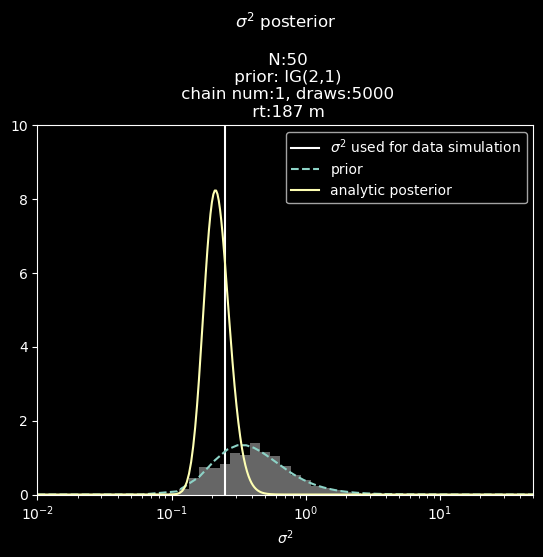

In [136]:
print("ABC with analytical posterior, increased threshold for more beta steps, th = 0.9")
plot_posterior_hist_fromstore(trace = res_checkPost_th09["trace"], 
                              stimulus_simulation = res_checkPost_th09["x_sim"], 
                              sigma2 = 0.25, 
                              inv_1 = 2, inv_2 = 1, 
                              N = 50, 
                              chain_num = 1, draw = 5000, rt = "187 m")

In [138]:

res_checkPost_th09_cth_005 = runModel_ABC(sigma2_true = 0.25, 
                                N=50, 
                                eps=1, 
                                ig_1=2, ig_2=1, 
                                ndraws=5000, nchains=1, ncores=1, 
                                threshold = 0.9, corr_threshold = 0.005)

c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\pymc\util.py:501: FutureWarning: The tag attribute observations is deprecated. Use model.rvs_to_values[rv] instead
  warnings.warn(


 <function gaussian at 0x000001A39295BBE0>
<function gaussian at 0x000001A39295BBE0>


ABC with analytical posterior, increased threshold for more beta steps, th = 0.9, corr th = 0.005


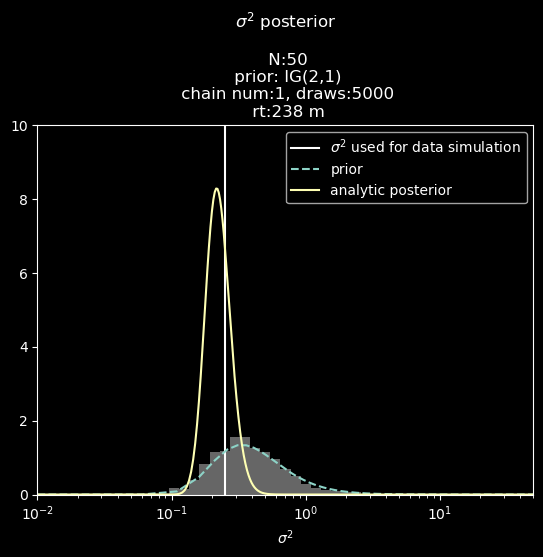

In [140]:
print("ABC with analytical posterior, increased threshold for more beta steps, th = 0.9, corr th = 0.005")
plot_posterior_hist_fromstore(trace = res_checkPost_th09_cth_005["trace"], 
                              stimulus_simulation = res_checkPost_th09_cth_005["x_sim"], 
                              sigma2 = 0.25, 
                              inv_1 = 2, inv_2 = 1, 
                              N = 50, 
                              chain_num = 1, draw = 5000, rt = "238 m")

In [142]:
res_checkPost_th09_cth_005["trace"]

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [137]:
res_checkPost_th09["trace"]

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

It's not an obvious problem with the simulator, as it returns the correct posterior, but there still may be some difference between the analytically generated simulator outputs and the sampled posteriors.

Let's look at the simulator result from the analytical case as well.

Result: they look pretty much the same, only difference is that here there were 48 iterations, while in the non-analytic ABC case only 11 iterations

In [76]:
global Xpost_sim_2
global sigma2_sim_2
global y_sim_2

Xpost_sim_2=np.array([])
sigma2_sim_2=np.array([])
y_sim_2=np.array([])

res_checkPost_analytic = runModel_ABC_analyticPost(sigma2_true = 0.25, 
                                                   N=50, 
                                                   eps=1, 
                                                   ig_1=2, ig_2=1, 
                                                   ndraws=5000, nchains=1, ncores=1)

 <function gaussian at 0x000001A39295BBE0>
<function gaussian at 0x000001A39295BBE0>


ABC with analytical posterior


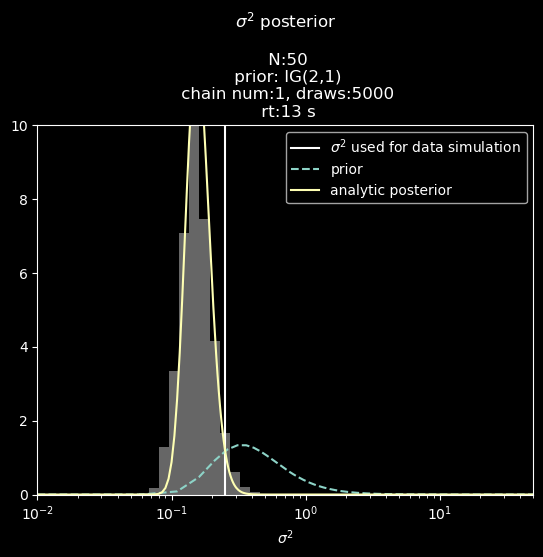

In [79]:
print("ABC with analytical posterior")
plot_posterior_hist_fromstore(trace = res_checkPost_analytic["trace"], 
                              stimulus_simulation = res_checkPost_analytic["x_sim"], 
                              sigma2 = 0.25, 
                              inv_1 = 2, inv_2 = 1, 
                              N = 50, 
                              chain_num = 1, draw = 5000, rt = "13 s")

In [87]:
res_checkPost["trace"]

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [84]:
res_checkPost_analytic["trace"]

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [85]:
N=50
ndraws=5000

nit_beta = int(len(sigma2_sim_2)/ndraws)

yS_2 = y_sim_2
yS_2 = np.reshape(yS_2, (nit_beta,ndraws,N))

XpostS_2 = Xpost_sim_2
XpostS_2 = np.reshape(XpostS_2, (nit_beta,ndraws,N))

sigma2S_2 = sigma2_sim_2
sigma2S_2 = np.reshape(sigma2S_2, (nit_beta,ndraws))
sigma2S_2_reshaped=np.reshape(np.repeat(sigma2S_2,N), (nit_beta,ndraws,N))

normalized_posterior = (XpostS_2 - 1/(1+sigma2S_2_reshaped)*yS_2) / np.sqrt((sigma2S_2_reshaped/(1+sigma2S_2_reshaped)))

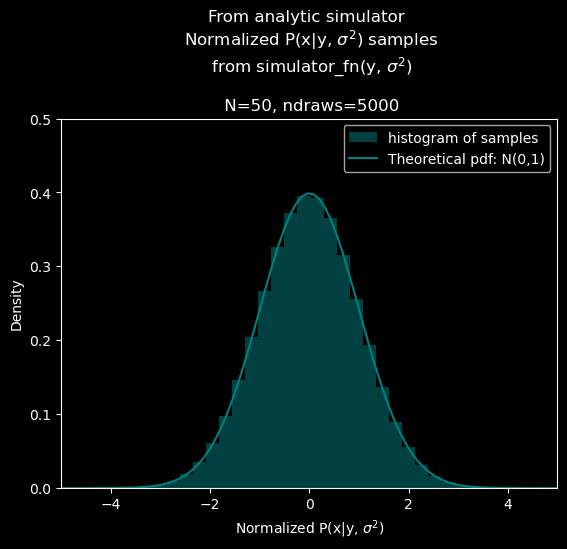

In [86]:
plt.hist(normalized_posterior.reshape(N*ndraws*nit_beta), density=True, bins=40, color='teal', alpha=0.5, label='histogram of samples')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, st.norm.pdf(x, 0, 1), alpha=1, color='teal', label='Theoretical pdf: N(0,1)')
plt.title('From analytic simulator \n Normalized P(x|y, $\sigma^2$) samples \n from simulator_fn(y, $\sigma^2$) \n\n N=50, ndraws=5000')
plt.xlabel('Normalized P(x|y, $\sigma^2$)')
plt.ylabel('Density')
axes=plt.gca()
axes.set_xlim([-5,5])
axes.set_ylim([0,0.5])

plt.legend(loc="upper right")


In [113]:
global Xpost_sim_3
global sigma2_sim_3
global y_sim_3

Xpost_sim_3 = np.array([])
sigma2_sim_3 = np.array([])
y_sim_3 = np.array([])

res_checkPost_analytic = runModel_ABC_analyticPost(sigma2_true = 0.25, 
                                                   N=10, 
                                                   eps=1, 
                                                   ig_1=2, ig_2=1, 
                                                   ndraws=3, nchains=1, ncores=1)

 <function gaussian at 0x000001A39295BBE0>
<function gaussian at 0x000001A39295BBE0>
0.9969263972069133
0.8100652299959705
0.5745559592210592
0.8092568081164556
0.810935065494868
0.8098966923106297


c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\pymc\smc\kernels.py:458: RuntimeWarning: invalid value encountered in divide
  return np.abs(ab / (self.aa * bb))
c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\pymc\smc\sampling.py:239: UserWarning: The number of samples is too small to check convergence reliably.
  _compute_convergence_checks(idata, draws, model, trace)


In [114]:
res_checkPost_analytic["trace"]

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

Additional checks for analytic posterior in the 1D and nD versions in model and simulator, there is not much difference apart from the runtime (23s vs 5m)

In [72]:
# with nD in the simulator and model as well
result5_an = runModel_ABC_analyticPost(sigma2_true = 0.25, N=50, eps=1, ig_1=2, ig_2=1, ndraws=5000, nchains=1, ncores=1)

 <function gaussian at 0x000001A39295BBE0>
<function gaussian at 0x000001A39295BBE0>


ABC with analytical posterior, nD in model


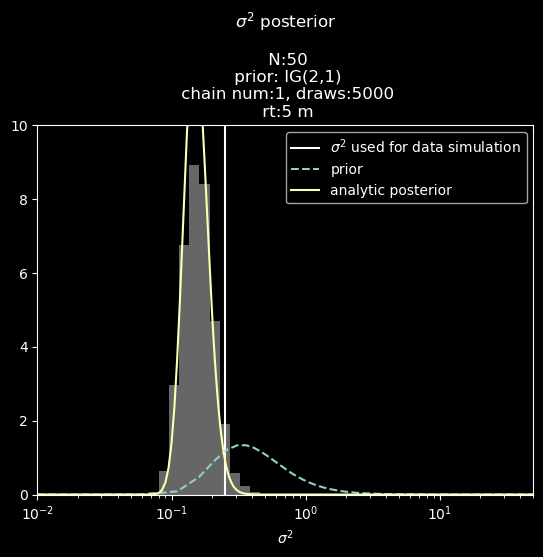

In [54]:
print("ABC with analytical posterior, nD in model")
plot_posterior_hist_fromstore(trace=result5_an["trace"], 
                              stimulus_simulation=result5_an["x_sim"], 
                              sigma2=0.25, 
                              inv_1=2, inv_2=1, 
                              N=50, 
                              chain_num=1, draw=5000, rt="5 m" )

In [53]:
#with 1d in simulator and model
result6_an = runModel_ABC_analyticPost(sigma2_true = 0.25, N=50, eps=1, ig_1=2, ig_2=1, ndraws=5000, nchains=1, ncores=1)

 <function gaussian at 0x000001A39295BBE0>
<function gaussian at 0x000001A39295BBE0>


ABC with analytical posterior, 1D in simulator and model


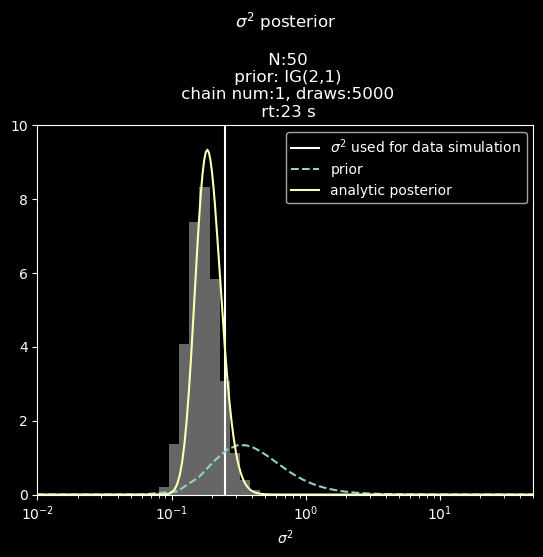

In [71]:
print("ABC with analytical posterior, 1D in simulator and model")
plot_posterior_hist_fromstore(trace=result6_an["trace"], 
                              stimulus_simulation=result6_an["x_sim"], 
                              sigma2=0.25, 
                              inv_1=2, inv_2=1, 
                              N=50, 
                              chain_num=1, draw=5000, rt="23 s")

In [39]:
def experimenter_analyticPost(x_sim, z_sim, eps, ig_1, ig_2):
    
    #compiled_ideal_observer_model = compileIdObs(x_sim) #for defining we need an input with the same shape
    
    def simulator_fn(rng, y, sigma2, size):
        i = rng.integers(2**32)
        
        xpost_mean = 1/(1 + sigma2) * y # analytically derived response mean
        xpost_var = sigma2 / (1 + sigma2) # analytically derived response std

        response_simulation = st.multivariate_normal(mean=xpost_mean, cov=np.identity(len(xpost_mean))*xpost_var).rvs(1)
        return response_simulation

    with pm.Model() as experimenter_model:
        sigma2 = pm.InverseGamma("sigma2", ig_1, ig_2)
        # Instead of sampling x_tilde, you can make it an implicit part of the simulator_fn
        y = pm.Normal("y", x_sim, np.sqrt(sigma2))  
        #pm.InverseGamma("sigma_hat", 2, 1, initval=0.8)

        pm.Simulator(
            "z",
            fn = simulator_fn, 
            distance = "gaussian",
            sum_stat = "identity",
            epsilon = eps,
            params = (y, sigma2),  
            observed = z_sim,
        )
        return experimenter_model

In [ ]:
def runModel_ABC_analyticPost(sigma2_true, N, eps, ig_1, ig_2, ndraws, nchains, ncores):

    #observation_var = observation_sigma**2
    #response_noise = response_sigma**2


    x_sim, y_sim, z_sim = generateData(N, sigma2_true )
    
    model_experimenter = experimenter_analyticPost(x_sim, z_sim, eps, ig_1, ig_2)
    
    trace = pm.sample_smc(model = model_experimenter, draws = ndraws, chains = nchains, cores = ncores, idata_kwargs={"log_likelihood": False})

    global result
    result = {'inputs':(sigma2_true, N, eps, ig_1, ig_2, ndraws, nchains, ncores), 
              'x_sim': x_sim, 
              'y_sim':y_sim,
              'z_sim': z_sim,
              'model_experimenter': model_experimenter,
              'trace': trace}

    return result

 <function gaussian at 0x0000028F6F087640>
<function gaussian at 0x0000028F6F087640>
<function gaussian at 0x0000028F6F087640>

 
 ####  Inferring  sigma2  in a  2  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 0.1
 ####  Prior arguments: 1, 1
 ####  ABC epsilon = 1, draws = 5000



C:\Users\szabo\AppData\Local\Temp\ipykernel_8048\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)


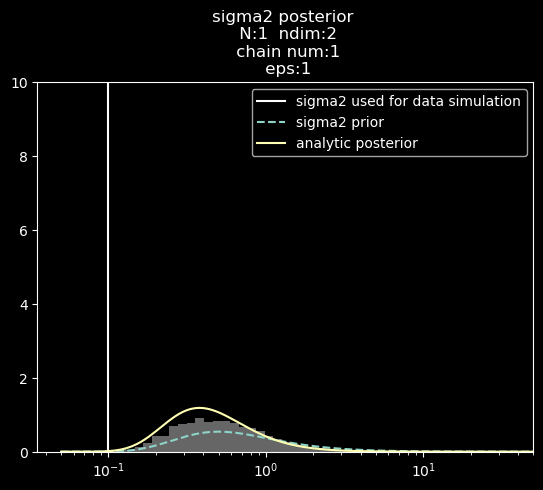

In [13]:
testABC(N = 1, target = "sigma2", ndim = 2, mu_true = 0.4, sigma2_true = 0.1, priorArg1 = 1, priorArg2 = 1, eps = 1, draws = 5000)